# Problem Set 2

This is the second homework assignment, which accounts for $15\%$ of your final grade. There are five questions, and their weights are:
* Q1: $20\%$,
* Q2: $20\%$,
* Q3: $20\%$,
* Q4: $20\%$,
* Q5: $20\%$.

You may work with other students. The maximum number of students per group is two. However, you can work on your own. Be sure to indicate with whom you have worked in your submission.

### Deadline: Nov 13, 2023 (5 PM HK Time). 

There is a penalty for late submissions: $5\%$ will be subtracted from the total mark for every additional day after the deadline. 

---

## Q1. Modelling Stock Returns via Random Walks

In week 4, we introduced the simple random walk, which starts at 0 and moves with steps of 1 and -1 occuring with equal probability. Suppose we use $X_t$ to denote such a simple random walk, $\Delta t$ is the time step (e.g., one trading day or week, etc.), and $\Delta X_{t+\Delta t} = X_{t+\Delta t} - X_{t}$ denotes the movement between time $t$ and $t+\Delta t$. The definition of simple random walks implies that 
$$
\mathbf{P} [\Delta X_{t+\Delta t} = 1] = \mathbf{P} [\Delta X_{t+\Delta t} = -1] = \frac{1}{2}. 
$$
In other words, $X_t$ increases or decreases by 1 unit with equal probabilities. 

In this question, we twist the simple walk to model stock returns. Suppose that we are interested in the S&P 500 index. The behaviors of this stock index are similar to the simple random walk in the sense that it is difficult to predict. However, the stock index tends to increase in the long run. For example, the average annualized return of the S&P 500 index is around $10\%$. We also want to change the step size of the simple random walk to fit the real behavior of the stock return. Let's use $P_t$ to denote the S&P 500 index (the stock price), so its return between time $t$ and $t+\Delta t$ is defined as 
$$
R_{t+\Delta t} = \frac{P_{t+\Delta t} - P_t}{P_t},
$$
and we model the behavior of $R_{t+\Delta t}$ as follows: 
$$
R_{t+\Delta t} = \mu \times \Delta t + \sigma \times \sqrt{\Delta t} \times \Delta X_{t+\Delta t},
$$
where $\mu$ and $\sigma$ are the mean and standard deviation of the S&P 500 index return. 

### Q1.1 

In this question, you are asked to write a ```stock_return_simulations``` with the specifications: 
```python
def stock_return_simulations(delta_t, mu, sigma, nsteps, nwalks):
    """
    delta_t: the time step, double numeric;
    mu, sigma: mean and standard deviation of the stock return, double numeric;
    nsteps: the number of steps in each stock return random walk, integer;
    nwalks: the number of stock return random walks, integer;
    Return: a two-dimensional np.array, with each row storing one draw of stock return
            random walk with nsteps. 
    """
```

Hint: The stock return equation is $R_{t+\Delta t} = \mu \times \Delta t + \sigma \times \sqrt{\Delta t} \times \Delta X_{t+\Delta t}$, where simulating $\Delta X_{t+\Delta t}$ (the simple random walk) is the same as in the function ```random_walk_simulations(nsteps, nwalks)``` in the lecture note. 

The np.array ```walks``` contains 1,000 draws of stock return random walks, each of which has 2,520 steps.
```python
walks = stock_return_simulations(delta_t, mu, sigma, nsteps, nwalks)
```

In [1]:
import numpy as np
np.random.seed(12345)

mu = 0.1   # annualised mean return
sigma = 0.2   # annualised standard deviation
delta_t = 1/252   # a trading day
nsteps = int(10 / delta_t)  # ten-year holding horizon
nwalks = 1000   # the number of random walk simulations

### Solution:

In [3]:
def stock_return_simulations(delta_t, mu, sigma, nsteps, nwalks):
    """
    delta_t: the time step, double numeric;
    mu, sigma: mean and standard deviation of the stock return, double numeric;
    nsteps: the number of steps in each stock return random walk, integer;
    nwalks: the number of stock return random walks, integer;
    Return: a two-dimensional np.array, with each row storing one draw of stock return
            random walk with nsteps. 
    """
    
    draws = np.random.randint(0, 2, size=(nwalks, nsteps))
    steps = np.where(draws > 0, 1, -1)
    walks = steps.cumsum(1)*sigma*np.sqrt(delta_t) + mu*np.arange(1,nsteps+1)*delta_t
    return walks
    

In [4]:
walks = stock_return_simulations(delta_t, mu, sigma, nsteps, nwalks)
print(walks.shape)

(1000, 2520)


### Q1.2 

You are asked to report the following statistics:
* Average cumulative stock returns in the final steps across 1,000 simulations, and
* Standard deviation of cumulative stock returns in the final steps across 1,000 simulations. 

Furthermore, you are asked to use the ```matplotlib``` to plot the following figures:
* On the left hand side, you need to plot the average cumulative stock returns across 1,000 simulations in each step (blue solid line). You should also include a line showing the theoretical mean returns: $\mu \times \Delta t \times \text{steps}$ (dotted green line). 
* On the right hand side, you need to plot the average cumulative stock returns across 1,000 simulations in each step (blue solid line). You should also include a line showing the theoretical standard deviation of the cumulative returns: $\sigma \times \sqrt{\Delta t \times \text{steps}}$ (dotted green line). 

### Solution:

In [5]:
print("Average cumulative returns after 10 years across 1,000 simulations:", walks[:,-1].mean())
print("Standard deviation of cumulative returns after 10 years across 1,000 simulations:", walks[:,-1].std())

Average cumulative returns after 10 years across 1,000 simulations: 0.9879303344952386
Standard deviation of cumulative returns after 10 years across 1,000 simulations: 0.6483569264895566


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'steps')

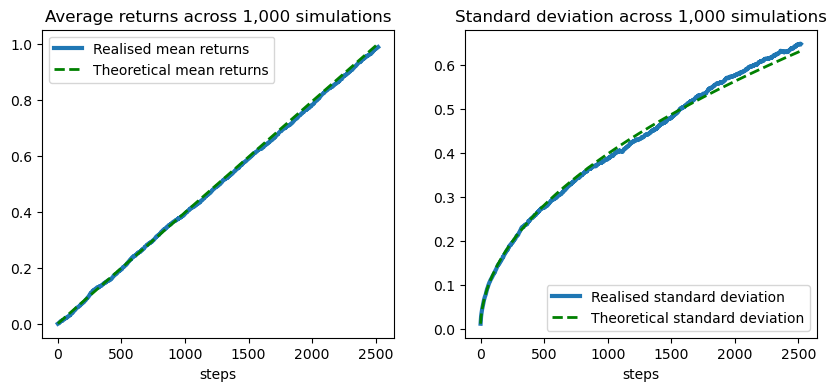

In [7]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.plot(walks.mean(axis=0), linewidth=3, label = 'Realised mean returns')
ax.plot(mu*delta_t*np.arange(1,1+nsteps), 'g--', linewidth=2, label = 'Theoretical mean returns')
ax.legend(loc='best')
ax.set_title("Average returns across 1,000 simulations")
plt.xlabel("steps")

ax = fig.add_subplot(1,2,2)
ax.plot(walks.std(axis=0), linewidth=3, label = 'Realised standard deviation')
ax.plot(sigma*np.sqrt(delta_t*np.arange(1,1+nsteps)), 'g--', linewidth=2, label = 'Theoretical standard deviation')
ax.legend(loc='best')
ax.set_title("Standard deviation across 1,000 simulations")
plt.xlabel("steps")


### Q1.3 

In this question, you are asked to compute the first-crossing time, the number of steps at which the cumulative stock returns are greater than $50\%$ (hint: use ```argmax``` function). 
* The ```first_crossing_time``` object should an np.array of length 1,000. 
* You need to make a histogram of the first-crossing time. 

### Solution:

In [10]:
first_crossing_time = (walks >= 0.5).argmax(axis=1)
print(first_crossing_time.shape)
# print(first_crossing_time)

(1000,)


(array([114.,   0.,   2.,   7.,  25.,  35.,  35.,  34.,  36.,  41.,  43.,
         33.,  38.,  31.,  41.,  29.,  39.,  20.,  18.,  25.,  13.,  23.,
         31.,  27.,  19.,  21.,  15.,  15.,  20.,  15.,  18.,  14.,   5.,
          9.,   9.,   9.,  10.,  12.,   4.,   9.,   7.,   3.,   3.,   9.,
          5.,   7.,   4.,  10.,   5.,   3.]),
 array([   0.  ,   50.04,  100.08,  150.12,  200.16,  250.2 ,  300.24,
         350.28,  400.32,  450.36,  500.4 ,  550.44,  600.48,  650.52,
         700.56,  750.6 ,  800.64,  850.68,  900.72,  950.76, 1000.8 ,
        1050.84, 1100.88, 1150.92, 1200.96, 1251.  , 1301.04, 1351.08,
        1401.12, 1451.16, 1501.2 , 1551.24, 1601.28, 1651.32, 1701.36,
        1751.4 , 1801.44, 1851.48, 1901.52, 1951.56, 2001.6 , 2051.64,
        2101.68, 2151.72, 2201.76, 2251.8 , 2301.84, 2351.88, 2401.92,
        2451.96, 2502.  ]),
 <BarContainer object of 50 artists>)

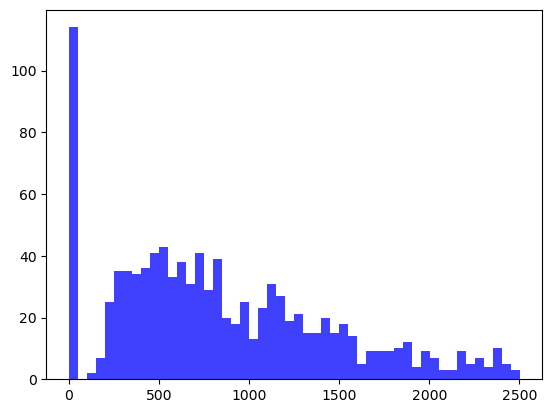

In [11]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
axes.hist(first_crossing_time, bins=50, color='b', alpha=0.75)

### Q1.4 

In this question, you are asked to report the **minimal** and **maximal** cumulative returns in each simulation and make histograms of the related objects as in the following figure. 

In [12]:
print(np.quantile(walks.min(axis=1), (0.05, 0.5, 0.95)))
print(np.quantile(walks.max(axis=1), (0.05, 0.5, 0.95)))

[-0.58777463 -0.13531277 -0.00113927]
[0.28028455 1.15043491 2.13191388]


In [13]:
walks.shape

(1000, 2520)

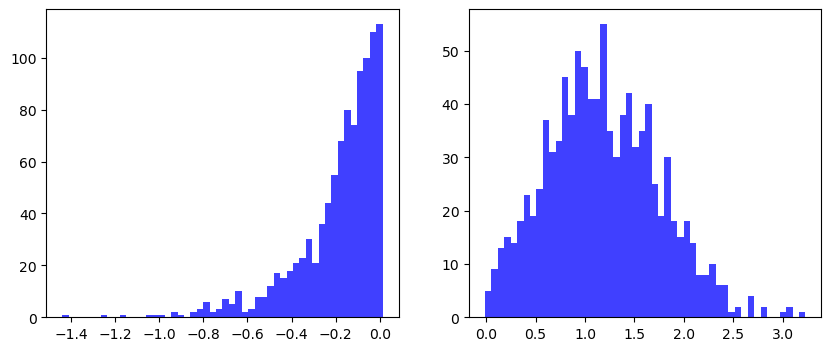

In [14]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10,4))

axes[0].hist(walks.min(axis=1), bins=50, color='b', alpha=0.75)
axes[1].hist(walks.max(axis=1), bins=50, color='b', alpha=0.75)

plt.subplots_adjust(wspace=0.2, hspace=0.2)

---

## Q2. Simple Linear Regression

In this question, we will explore how to use firm characteristics to predict stock returns. First, you need to load the data **"HK_stocks_151signals.parquet"**. 

In [15]:
import numpy as np
import pandas as pd

In [16]:
D = pd.read_parquet('../data/HK_stocks_151signals.parquet', engine='pyarrow')
print(D.shape)

(413279, 154)


### Q2.1 

In this question, you need to preprocess the data as follows:
* Create a new dataframe ```D_subset``` containing only two columns, ```'ret_exc_lead1m'``` and ```'be_me'```.
* Create a hierarchical index for ```D_subset``` using two columns, ```'id'``` and ```'eom'```, as the index.

### Solution

In [17]:
D_subset = D[['id', 'eom', 'ret_exc_lead1m', 'be_me']]
D_subset = D_subset.set_index(['id', 'eom'])
D_subset

ret_exc_lead1m     be_me
id          eom                                 
310108801.0 1990-07-31       -0.094007  0.552603
            1990-08-31       -0.145700  0.605826
            1990-09-30        0.151076  0.704216
            1990-10-31        0.017782  0.614900
            1990-11-30        0.020163  0.600821
...                                ...       ...
333190801.0 2021-08-31       -0.096822  0.831987
            2021-09-30        0.142375  0.921143
            2021-10-31       -0.040934  0.818252
            2021-11-30       -0.032445  0.853137
            2021-12-31        0.183270  0.881683

[413279 rows x 2 columns]

### Q2.2

In this question, you are asked to **handle missing values**
* (1) Calculate the percentage of missing entries for each column in ```D_subset```. 
* (2) Drop the rows whenever the stock returns (the column ```'ret_exc_lead1m'```) are missing.
* (3) Replace the missing ```'be_me'``` column with zeros. 

### Solution:

In [18]:
print(D_subset.isnull().mean())

ret_exc_lead1m    0.00610
be_me             0.07833
dtype: float64


In [19]:
D_subset2 = D_subset[D_subset['ret_exc_lead1m'].isnull()==False] 
print(D_subset2.isnull().mean())

ret_exc_lead1m    0.000000
be_me             0.077637
dtype: float64


In [20]:
D_subset3 = D_subset2.fillna(0)
print(D_subset3.isnull().mean())

ret_exc_lead1m    0.0
be_me             0.0
dtype: float64


### Q2.3

In this question, you are going to use book-to-market ratios (the column ```'be_me'```) to predict future stock returns (```'ret_exc_lead1m'```). You will use the ```statsmodels``` package. You are asked to do the followings:
* Install the ```statsmodels``` package (we introduced how to install packages in week 1). 
* Execute the following codes
```python
import statsmodels.api as sm
mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary())
```
  * where X denotes the predictors, where the first column is a constant (a vector of ones) and the second column is ```'be_me'```
  * Y denotes the outcome variable, which is the stock return in this question. 

### Solution:

In [23]:
#X = np.concatenate((np.ones((len(D_subset3[['be_me']]),1)), np.array(D_subset3[['be_me']])), axis=1)
X = D_subset3[['be_me']]
X['constant'] = 1
Y = D_subset3[['ret_exc_lead1m']]

In [24]:
import statsmodels.api as sm

In [25]:
mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         ret_exc_lead1m   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     186.1
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           2.33e-42
Time:                        22:34:11   Log-Likelihood:            -1.0935e+05
No. Observations:              410758   AIC:                         2.187e+05
Df Residuals:                  410756   BIC:                         2.187e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
be_me          0.0017      0.000     13.641      0.0

### Q2.4 (Bonus question)

How do you interpret the coefficient estimate of ```'be_me'```? 

---

## Q3. ```for``` loop vs Vectorization (Matrix Multiplication)

In this question, we will explore the performance of the **matrix multiplication** using ```for``` loops. 

Suppose that $A$ is an $m \times n$ matrix and $B$ is an $n \times p$ matrix: 
$$
A = \begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots & \vdots & \vdots \\
    a_{m1} & a_{m2} & \cdots & a_{mn} \\
\end{pmatrix}, \ \ \ 
B = \begin{pmatrix}
    b_{11} & b_{12} & \cdots & b_{1p} \\
    b_{21} & b_{22} & \cdots & b_{2p} \\
    \vdots & \vdots & \vdots & \vdots \\
    b_{n1} & b_{n2} & \cdots & b_{np} \\
\end{pmatrix}. 
$$
<br>

The **matrix product** $C = AB$ is defined to be the $m \times p$ matrix, with the $(i,j)$-th element $c_{ij}$ defined as 
$$
c_{ij} = \sum^n_{k=1} a_{ik} b_{kj}, 
$$
for $i = 1, \dots, m$ and $j = 1, \dots, p$. 

Using the above equation ($c_{ij} = \sum^n_{k=1} a_{ik} b_{kj}$), we can define our own function of matrix multiplication using ```for``` loops, with the following function specifications:
```python
def naive_matrix_mul(A, B):
    """
    A: 2-dimensional np.array with dimensions m times n;
    B: 2-dimensional np.array with dimensions n times p;
    Return the matrix product C = AB, which is a 2-dimensional np.array with dimensions m times p. 
    You are NOT allowed to use any vectorization, including A@B, (A[i,:] * B[:,j]).sum(), etc. 
    In other words, you can use only the for loop. 
    """
```

In the function ```naive_matrix_mul```, you need to check whether the matrices A and B are conformable. If not, the function should raise an ```AssertionError```. For example, if you execute the following command:
```python
import numpy as np
naive_matrix_mul(np.random.normal(size=(10,5)), np.random.normal(size=(4,10)))
```
you will detect the following assertion:
```python
AssertionError: A and B are NOT conformable!
```

### Solution:

In [26]:
def naive_matrix_mul(A, B):
    """
    A: 2-dimensional np.array with dimensions m times n;
    B: 2-dimensional np.array with dimensions n times p;
    Return the matrix product C = AB, which is a 2-dimensional np.array with dimensions m times p. 
    You are NOT allowed to use any vectorization, including A@B, (A[i,:] * B[:,j]).sum(), etc. 
    In other words, you can use only the for loop. 
    """
    
    m, n1 = A.shape
    n2, p = B.shape
    assert n1==n2, "A and B are NOT conformable!"
    n = n1
    
    C = np.zeros((m,p))
    for mm in range(m):
        for pp in range(p):
            for nn in range(n):
                C[mm,pp] = C[mm,pp] + A[mm,nn]*B[nn,pp]
    
    return C
    

#### AssertionError

In [27]:
naive_matrix_mul(np.random.normal(size=(10,5)), np.random.normal(size=(4,10)))

AssertionError: A and B are NOT conformable!

After you write down the ```naive_matrix_mul``` function, you need to compare the performance of ```naive_matrix_mul``` with the numpy function ```@```. Please use the numpy function ```np.random.normal``` to simulate two ```np.array```s: (1) A: $1000 \times 500$ matrix and (2) B: $500 \times 200$ matrix (please set the random seed as in the lecture note). Next, you will use ```timeit``` to estimate the run time of the ```naive_matrix_mul``` and ```@``` functions. 

In [28]:
import numpy as np
np.random.seed(12345)

m = 1000
p = 200
n = 500

A = np.random.normal(size=(m,n))
B = np.random.normal(size=(n,p))
print(A.shape)
print(B.shape)

(1000, 500)
(500, 200)


In [29]:
%timeit naive_matrix_mul(A, B)

28.6 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%timeit A @ B

341 µs ± 87.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


---

## Q4. Using SQL ```SELECT``` Statement

In this question, you will need to create a ```.db``` file and use the **SQL** (more precisely, ```SQLite3```) statements to explore the database. 

In [31]:
import sqlite3
import pandas as pd

### Q4.1 

First, you need to create a database named ```"ps2_stocks.db"```, with two tables in this dataset. 
* 'stock_returns': contains four variables, ```['key', 'id', 'eom', 'ret_exc_lead1m']```;
* 'size_signals': contains eight variables ```['key', 'id', 'eom', 'ami_126d', 'dolvol_126d', 'market_equity', 'prc', 'rd_me']```;
* 'profitability_signal': contains seven variables ```['key', 'id', 'eom', 'dolvol_var_126d', 'ebit_bev', 'ebit_sale', 'ni_be']```, 

where the variable ```'key'``` is the primary key of the dataset. **You need to create your own primary key**. <br>

After you create the ```"ps2_stocks.db"``` database, you will need to Get the table information as follows:
```python
Information about table stock_returns:
[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'ret_exc_lead1m', 'REAL', 0, None, 0)]

Information about table size_signals:
[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'ami_126d', 'REAL', 0, None, 0),
 (4, 'dolvol_126d', 'REAL', 0, None, 0),
 (5, 'market_equity', 'REAL', 0, None, 0),
 (6, 'prc', 'REAL', 0, None, 0),
 (7, 'rd_me', 'REAL', 0, None, 0)]

Information about table profitability_signals:
[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'dolvol_var_126d', 'REAL', 0, None, 0),
 (4, 'ebit_bev', 'REAL', 0, None, 0),
 (5, 'ebit_sale', 'REAL', 0, None, 0),
 (6, 'ni_be', 'REAL', 0, None, 0)]
```

In [13]:
D = pd.read_parquet('../data/HK_stocks_151signals.parquet', engine='pyarrow')
D['key'] = D.index

identifier_var_list = ['key', 'id', 'eom', 'ret_exc_lead1m']
size_list = ['key', 'id', 'eom', 'ami_126d', 'dolvol_126d', 'market_equity', 'prc', 'rd_me']
profitability_list = ['key', 'id', 'eom', 'dolvol_var_126d', 'ebit_bev', 'ebit_sale', 'ni_be']


In [3]:
conn = sqlite3.connect('ps2_stocks.db')
D[identifier_var_list].to_sql('stock_returns', conn, if_exists='replace', index=False)
D[size_list].to_sql('size_signals', conn, if_exists='replace', index=False)
D[profitability_list].to_sql('profitability_signals', conn, if_exists='replace', index=False)
conn.close()

In [4]:
conn = sqlite3.connect('ps2_stocks.db')
c = conn.cursor()

In [5]:
query = """
PRAGMA table_info('stock_returns')  -- Get the table information
"""

stock_returns = c.execute(query)
print("Information about table stock_returns:")
stock_returns.fetchall()

Information about table stock_returns:


[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'ret_exc_lead1m', 'REAL', 0, None, 0)]

In [6]:
query = """
PRAGMA table_info('size_signals')  -- Get the table information
"""

size_signals = c.execute(query)
print("Information about table size_signals:")
size_signals.fetchall()

Information about table size_signals:


[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'ami_126d', 'REAL', 0, None, 0),
 (4, 'dolvol_126d', 'REAL', 0, None, 0),
 (5, 'market_equity', 'REAL', 0, None, 0),
 (6, 'prc', 'REAL', 0, None, 0),
 (7, 'rd_me', 'REAL', 0, None, 0)]

In [7]:
query = """
PRAGMA table_info('profitability_signals')  -- Get the table information
"""

profitability_signals = c.execute(query)
print("Information about table profitability_signals:")
profitability_signals.fetchall()

Information about table profitability_signals:


[(0, 'key', 'INTEGER', 0, None, 0),
 (1, 'id', 'REAL', 0, None, 0),
 (2, 'eom', 'TIMESTAMP', 0, None, 0),
 (3, 'dolvol_var_126d', 'REAL', 0, None, 0),
 (4, 'ebit_bev', 'REAL', 0, None, 0),
 (5, 'ebit_sale', 'REAL', 0, None, 0),
 (6, 'ni_be', 'REAL', 0, None, 0)]

### Q4.2

Select the stock-month observations from the ```'stock_returns'``` table that satisfy the following requirements:
* Select all four variables
* The stock return should be between $-0.1$ and $0.1$ and is NOT missing
* The stock id contains ```131```
* Sort the data by ```eom``` and ```id``` in order
* Select only 100 lines from the sorted data. 

In [13]:
query = """
SELECT *
FROM stock_returns
WHERE (ret_exc_lead1m IS NOT NULL) AND (ret_exc_lead1m BETWEEN -0.1 AND 0.1) AND (id LIKE '%131%') 
ORDER BY eom, id
LIMIT 100;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(14208700, 310393201.0, '1990-09-30 00:00:00', 0.03458102968770602),
 (14209110, 310393501.0, '1990-09-30 00:00:00', 0.08663803117209133),
 (14209111, 310393501.0, '1990-10-31 00:00:00', -0.03724104688904266),
 (14209112, 310393501.0, '1990-11-30 00:00:00', 0.01940524657318734),
 (14208703, 310393201.0, '1990-12-31 00:00:00', 0.08380891511433819),
 (14208704, 310393201.0, '1991-01-31 00:00:00', 0.09562373698596735),
 (14209116, 310393501.0, '1991-03-31 00:00:00', -0.044405264519070585),
 (14208707, 310393201.0, '1991-04-30 00:00:00', -0.042186564619436435),
 (14209117, 310393501.0, '1991-04-30 00:00:00', 0.0970218307681208),
 (14208708, 310393201.0, '1991-05-31 00:00:00', 0.05070395987859581),
 (14209118, 310393501.0, '1991-05-31 00:00:00', -0.031069292825171423),
 (14208710, 310393201.0, '1991-07-31 00:00:00', -0.03016342460367682),
 (14209120, 310393501.0, '1991-07-31 00:00:00', -0.018439886293369897),
 (14208711, 310393201.0, '1991-08-31 00:00:00', 0.051219171482461974),
 (14209121

### Q4.3

Compute the average returns for the stocks that satisfy the following requirements: 
* Report ```id``` and create a new variable ```mean_ret``` to denote the average returns for selected stocks
* The stock returns should be between $-0.2$ and $0.2$ and is NOT missing
* The number of time-series observations is greater than 240.

**Hint:** consider ```GROUP BY``` and ```HAVING``` statements. 

In [22]:
query = """
SELECT id, AVG(ret_exc_lead1m) AS mean_ret
FROM stock_returns
WHERE (ret_exc_lead1m IS NOT NULL) AND (ret_exc_lead1m BETWEEN -0.2 AND 0.2) 
GROUP BY id
HAVING COUNT(*) >= 240;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(301549801.0, 0.012466333108351168),
 (301553001.0, 0.006724256120052304),
 (301565201.0, -0.0013064695980869064),
 (301569701.0, 0.004642345699104739),
 (301574903.0, 0.00301511221569604),
 (301584001.0, 0.010126698523495231),
 (301653801.0, -0.0015160123613721247),
 (301659001.0, 0.008444895269752166),
 (301659101.0, 0.007285680786985728),
 (301662101.0, 0.005605905017748517),
 (301852602.0, 0.008897007167553697),
 (301864901.0, 0.0011585163444499723),
 (301908301.0, -0.002161940440969657),
 (301942101.0, 0.004638467229423168),
 (301962601.0, 0.005020420074348027),
 (302138301.0, 0.003247650911726292),
 (302401603.0, -0.0037626916268711356),
 (302865301.0, -0.00033747797109153594),
 (303074701.0, 0.004927261598375259),
 (306284401.0, -0.003104333175251189),
 (306306401.0, -0.0018807140435321244),
 (306415901.0, -0.018140616039865113),
 (306433601.0, -0.006668634326697205),
 (306566201.0, 0.003631547403086989),
 (310054001.0, -0.014608307263233956),
 (310056201.0, 0.00324584086792729

### Q4.4

In this question, you are asked to merge both the ```ami_126d``` in table ```size_signals``` and ```ebit_bev``` in table ```profitability_signals``` into the ```stock_returns``` table.

In [30]:
query = """
SELECT stock_returns.key,  
       stock_returns.id, 
       stock_returns.eom, 
       ret_exc_lead1m, ami_126d, ebit_bev
FROM stock_returns, size_signals, profitability_signals
WHERE size_signals.key = stock_returns.key AND profitability_signals.key = stock_returns.key;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[(13581256,
  310108801.0,
  '1990-07-31 00:00:00',
  -0.09400676194570491,
  None,
  0.17328912011891834),
 (13581257,
  310108801.0,
  '1990-08-31 00:00:00',
  -0.14569978347999013,
  None,
  0.17328912011891834),
 (13581258,
  310108801.0,
  '1990-09-30 00:00:00',
  0.15107615827555618,
  None,
  0.17328912011891834),
 (13581259,
  310108801.0,
  '1990-10-31 00:00:00',
  0.017782245901352873,
  None,
  0.17328912011891834),
 (13581260,
  310108801.0,
  '1990-11-30 00:00:00',
  0.020162740476097583,
  None,
  0.17328912011891834),
 (13581261,
  310108801.0,
  '1990-12-31 00:00:00',
  0.10634087906704814,
  None,
  0.17328912011891834),
 (13581262,
  310108801.0,
  '1991-01-31 00:00:00',
  0.04320242424320072,
  None,
  0.17328912011891834),
 (13581263,
  310108801.0,
  '1991-02-28 00:00:00',
  0.22126074089995698,
  None,
  0.17328912011891834),
 (13581264,
  310108801.0,
  '1991-03-31 00:00:00',
  -0.033720972104480905,
  None,
  0.17328912011891834),
 (13581265,
  310108801.0,
  '1

### Q4.5

Compute the average returns per period (grouped by ```eom```) that satisfy the following requirements: 
* Report ```eom``` and create a new variable ```mean_ret``` to denote the average returns for selected observations
* The observations should satisfy ```ami_126d > 0.5``` and ```ebit_bev > 0.01```
* Sorted by ```eom```.

**Hint:** consider subqueries.

In [29]:
query = """
SELECT eom, AVG(ret_exc_lead1m) AS mean_ret
FROM stock_returns
WHERE key IN (SELECT key
              FROM size_signals
              WHERE ami_126d > 0.5 AND key IN (SELECT key
                                               FROM profitability_signals
                                               WHERE ebit_bev > 0.01))
GROUP BY eom
ORDER BY eom;
"""

stock_returns = c.execute(query)
stock_returns.fetchall()

[('1990-07-31 00:00:00', -0.21642281976630828),
 ('1990-08-31 00:00:00', -0.017749415692749067),
 ('1990-09-30 00:00:00', 0.048639425613139976),
 ('1990-10-31 00:00:00', -0.031008400890172854),
 ('1990-11-30 00:00:00', 0.015185944361440693),
 ('1990-12-31 00:00:00', 0.02827023388146484),
 ('1991-01-31 00:00:00', 0.09232950212155608),
 ('1991-02-28 00:00:00', 0.026123162941439796),
 ('1991-03-31 00:00:00', -0.06076737877475232),
 ('1991-04-30 00:00:00', -0.01748468812636258),
 ('1991-05-31 00:00:00', 0.004632740446191235),
 ('1991-06-30 00:00:00', 0.07601797424490848),
 ('1991-07-31 00:00:00', -0.06934873801105233),
 ('1991-08-31 00:00:00', 0.0021606273736066413),
 ('1991-09-30 00:00:00', 0.023331518713999067),
 ('1991-10-31 00:00:00', 0.029149772035347837),
 ('1991-11-30 00:00:00', -0.06688289423182765),
 ('1991-12-31 00:00:00', 0.20605996394468865),
 ('1992-01-31 00:00:00', -0.013481933604514629),
 ('1992-02-29 00:00:00', 0.11142935111563763),
 ('1992-03-31 00:00:00', 0.14605276744179

---

## Q5. Discretization and Binning

In this question, you will explore a simple exercise of grouping stocks into five portfolios based on firm characteristics. 

### Q5.1

First, you need to load the data **"HK_stocks_151signals.parquet"** and select a subset of variables. The list of selected variables is 
```python
['id','eom','ret_exc_lead1m','capex_abn','debt_gr3','fnl_gr1a','ncol_gr1a','nfna_gr1a','ni_ar1','noa_at']
```

Next, you need to the subsample in March 2020 (Hint: use ```D_subset['eom'] == "2020-03-31"```).

Finally, you delete the ```'eom'``` column and use the ```'id'``` column as the index. Now you should obtain the dataframe named ```D_subset``` (or you can use other variable name).

In [77]:
import numpy as np
import pandas as pd

In [78]:
D = pd.read_parquet('../data/HK_stocks_151signals.parquet', engine='pyarrow')
print(D.shape)
debt_issue_list = ['capex_abn', 'debt_gr3', 'fnl_gr1a', 'ncol_gr1a', 'nfna_gr1a', 'ni_ar1', 'noa_at']
D_subset = D[['id', 'eom', 'ret_exc_lead1m'] + debt_issue_list]
D_subset = D_subset[D_subset['eom'] == "2020-03-31"]

(413279, 154)


In [79]:
D_subset = D_subset.drop(['eom'], axis=1)
D_subset = D_subset.set_index(['id'])
print(D_subset.isnull().mean())
D_subset.sort_index().head()

ret_exc_lead1m    0.006882
capex_abn         0.321290
debt_gr3          0.204731
fnl_gr1a          0.036989
ncol_gr1a         0.205161
nfna_gr1a         0.036989
ni_ar1            0.271398
noa_at            0.201720
dtype: float64


,ret_exc_lead1m,capex_abn,debt_gr3,fnl_gr1a,ncol_gr1a,nfna_gr1a,ni_ar1,noa_at
id,,,,,,,,
301393202.0,-0.112333,-0.260019,0.322910,0.100532,-0.010289,-0.105978,0.585933,0.794235
301549801.0,0.030343,NaN,3.796531,0.013494,NaN,-0.014873,-0.491921,NaN
301553001.0,-0.014241,NaN,-0.482458,0.001824,NaN,0.008761,-0.269216,NaN
301565201.0,0.140135,NaN,0.683266,0.012795,NaN,-0.012486,0.119235,NaN
301569701.0,0.072919,NaN,0.657939,0.014958,NaN,-0.016685,-0.175621,NaN


### Q5.2

In this question, you are asked to report the missing rates for each variable in the ```D_subset``` DataFrame. You also need to make a bar plot showing the missing rates as shown in the following figure. Finally, you need to fill in the missing entries with the average values of these variables. For example, you use ```D_subset['nfna_gr1a'].mean()``` to impute the missing entries of ```'nfna_gr1a'``` (Hint: Calling ```fillna``` with a ```dict```). The imputed DataFrame is called ```D_subset2```. 

In [81]:
var_missing_rates = D_subset.isna().mean()
var_missing_rates

ret_exc_lead1m    0.006882
capex_abn         0.321290
debt_gr3          0.204731
fnl_gr1a          0.036989
ncol_gr1a         0.205161
nfna_gr1a         0.036989
ni_ar1            0.271398
noa_at            0.201720
dtype: float64

<AxesSubplot:>

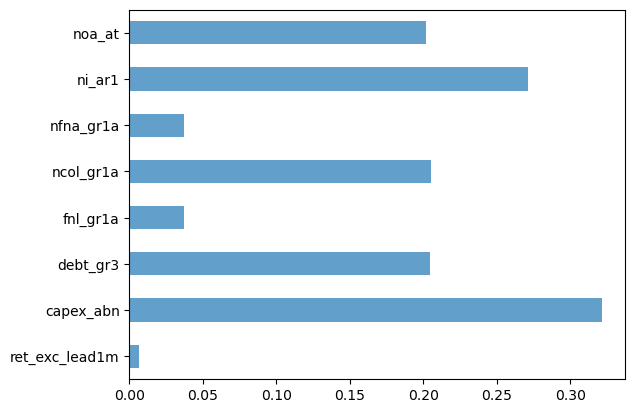

In [83]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1)

var_missing_rates.plot.barh(alpha=0.7)


In [84]:
replace_vals = {}
for i in range(D_subset.shape[1]):
    replace_vals[D_subset.columns[i]] = D_subset.iloc[:,i].mean()

In [85]:
D_subset2 = D_subset.fillna(replace_vals)

### Q5.3

In this question, you are required to use the ```qcut``` method to create **five roughly equal-size bins** for the ```'debt_gr3'``` column. The output should be a ```pd.Series``` named ```debt_gr3_cat```. Next, you will use ```debt_gr3_cat``` to create a **dummy matrix**. Since ```debt_gr3_cat``` has five distinct values, you would derive a matrix or DataFrame with five columns containing all 1s and 0s. Finally, rename the columns in the dummy matrix as ```['Q1', 'Q2', 'Q3', 'Q4', 'Q5']```. 

In [53]:
D_subset2.columns

Index(['ret_exc_lead1m', 'capex_abn', 'debt_gr3', 'fnl_gr1a', 'ncol_gr1a',
       'nfna_gr1a', 'ni_ar1', 'noa_at'],
      dtype='object')

In [55]:
debt_gr3_cat = pd.qcut(D_subset2['debt_gr3'], 5)
debt_gr3_cat.head()

id
310108801.0      (0.157, 1.152]
310110201.0     (-0.334, 0.157]
310110301.0     (-0.334, 0.157]
310119401.0    (-1.001, -0.334]
310121701.0      (0.157, 1.152]
Name: debt_gr3, dtype: category
Categories (5, interval[float64, right]): [(-1.001, -0.334] < (-0.334, 0.157] < (0.157, 1.152] < (1.152, 63.266] < (63.266, 50992.0]]

In [58]:
debt_gr3_dummy = pd.get_dummies(debt_gr3_cat)
debt_gr3_dummy.columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
debt_gr3_dummy.head()

,Q1,Q2,Q3,Q4,Q5
id,,,,,
310108801.0,0,0,1,0,0
310110201.0,0,1,0,0,0
310110301.0,0,1,0,0,0
310119401.0,1,0,0,0,0
310121701.0,0,0,1,0,0


### Q5.4 

In this question, you need to first merge ```D_subset2``` with ```debt_gr3_dummy```. The resultant DataFrame is named as ```D_subset3```. Next, you group the stocks into five groups based on the dummy matrix and compute the average returns in five groups. That is to say, you will need to report the average returns for groups 'Q1' -- 'Q5'. Finally, you need to make a bar plot of average returns in five groups, as shown in the following figure.

In [69]:
D_subset3 = D_subset2.join(debt_gr3_dummy)

In [66]:
portfolio_rets = pd.Series(np.zeros(5))
portfolio_rets.iloc[0] = D_subset3.loc[D_subset3['Q1']==1, 'ret_exc_lead1m'].mean()
portfolio_rets.iloc[1] = D_subset3.loc[D_subset3['Q2']==1, 'ret_exc_lead1m'].mean()
portfolio_rets.iloc[2] = D_subset3.loc[D_subset3['Q3']==1, 'ret_exc_lead1m'].mean()
portfolio_rets.iloc[3] = D_subset3.loc[D_subset3['Q4']==1, 'ret_exc_lead1m'].mean()
portfolio_rets.iloc[4] = D_subset3.loc[D_subset3['Q5']==1, 'ret_exc_lead1m'].mean()
portfolio_rets.index = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

In [67]:
portfolio_rets

Q1    0.013358
Q2    0.034817
Q3    0.026858
Q4    0.026515
Q5    0.019752
dtype: float64

<AxesSubplot:>

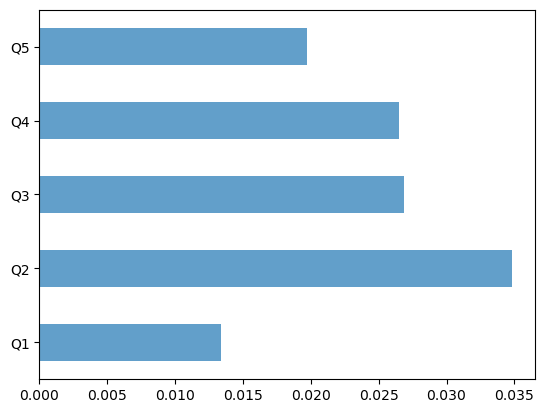

In [86]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1)

portfolio_rets.plot.barh(alpha=0.7)

---

# END